# <a id=id1><center>Module 3- Regression & Beta Calculation</center></a>

## <a id=id3 style="color:#FF0000;">Fundamental analysis using Regression</a>
This module would introduce us to the Regression related inferences to be drawn from the data.

Regression is basically a statistical approach to find the relationship between variables. In machine learning, this is used to predict the outcome of an event based on the relationship between variables obtained from the data-set. More often than not, we utilize linear regression to come up with an ideal inference. We'd be using the regression model to solve the following problems:

## <a id=id1>PROBLEM STATEMENT 3.1 </a>
Import the file 'gold.csv', which is contains the data about last 2 years price action of Indian(MCX) gold standard. Explore the dataframe. You'd see 2 unique columns - 'Pred' and 'new'.

One of the 2 columns is a linear combination of the OHLC prices with varying coefficients while the other is a polynomial fucntion of the same inputs. Also, one of the 2 columns is partially filled.

>Using linear regression, find the coefficients of the inputs and using the same trained model, complete the
      entire column.
      
>Also, try to fit the other column as well using a new linear regression model. Check if the predicitons are 
      accurate.
      Mention which column is a linear function and which is a polynomial function.
      (Hint: Plotting a histogram & distplot helps in recognizing the  discrepencies in prediction, if any.)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#### Import the file 'gold.csv'

In [2]:
gold_data = pd.read_csv('GOLD.csv')

In [3]:
gold_data

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318
...,...,...,...,...,...,...,...,...,...
507,"Apr 26, 2019",31868,31851,31934,31705,9.67K,0.08%,NaN,247.177322
508,"Apr 30, 2019",31625,31800,31824,31597,6.44K,-0.76%,NaN,52.201158
509,"May 01, 2019",31563,31604,31657,31503,1.55K,-0.20%,NaN,113.293305
510,"May 02, 2019",31203,31420,31425,31160,0.48K,-1.14%,NaN,48.365693


In [4]:
gold_data.columns = ['Date', 'Price', 'Open', 'High', 'Low', 'Vol', 'Change_Pct', 'Pred', 'new']

In [5]:
gold_data.Date = pd.to_datetime(gold_data.Date)

In [6]:
gold_data.dtypes

Date          datetime64[ns]
Price                  int64
Open                   int64
High                   int64
Low                    int64
Vol                   object
Change_Pct            object
Pred                 float64
new                  float64
dtype: object

In [7]:
gold_data.set_index('Date', inplace=True)

In [8]:
gold_data.head()

,Price,Open,High,Low,Vol,Change_Pct,Pred,new
Date,,,,,,,,
2017-05-04,28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
2017-05-05,28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2017-05-08,28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
2017-05-09,27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
2017-05-10,28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318


#### Making some changes 

In [9]:
gold_data.Vol = gold_data.Vol.str.replace('K','').astype(float)

In [10]:
gold_data.head()

,Price,Open,High,Low,Vol,Change_Pct,Pred,new
Date,,,,,,,,
2017-05-04,28060,28400,28482,28025,0.08,-1.79%,738.0,117.570740
2017-05-05,28184,28136,28382,28135,0.06,0.44%,-146.0,295.430176
2017-05-08,28119,28145,28255,28097,7.85,-0.23%,30.0,132.123714
2017-05-09,27981,28125,28192,27947,10.10,-0.49%,357.0,101.298064
2017-05-10,28007,28060,28146,27981,9.28,0.09%,124.0,112.153318


In [11]:
gold_data.Vol = gold_data.Vol * 1000

In [12]:
gold_data.head()

,Price,Open,High,Low,Vol,Change_Pct,Pred,new
Date,,,,,,,,
2017-05-04,28060,28400,28482,28025,80.0,-1.79%,738.0,117.570740
2017-05-05,28184,28136,28382,28135,60.0,0.44%,-146.0,295.430176
2017-05-08,28119,28145,28255,28097,7850.0,-0.23%,30.0,132.123714
2017-05-09,27981,28125,28192,27947,10100.0,-0.49%,357.0,101.298064
2017-05-10,28007,28060,28146,27981,9280.0,0.09%,124.0,112.153318


In [13]:
gold_data.Change_Pct = gold_data.Change_Pct.str.replace('%','').astype(float)

In [14]:
gold_data.head()

,Price,Open,High,Low,Vol,Change_Pct,Pred,new
Date,,,,,,,,
2017-05-04,28060,28400,28482,28025,80.0,-1.79,738.0,117.570740
2017-05-05,28184,28136,28382,28135,60.0,0.44,-146.0,295.430176
2017-05-08,28119,28145,28255,28097,7850.0,-0.23,30.0,132.123714
2017-05-09,27981,28125,28192,27947,10100.0,-0.49,357.0,101.298064
2017-05-10,28007,28060,28146,27981,9280.0,0.09,124.0,112.153318


####  Linear Regression
Using linear regression, find the coefficients of the inputs and using the same trained model, complete the entire column.

In [15]:
Pred_NaN_count = len(gold_data[gold_data.Pred.isna()])

In [17]:
Pred_NaN_count

101

In [18]:
dataset = gold_data[['Open', 'High', 'Low', 'Price', 'Pred']].iloc[:-Pred_NaN_count]

In [19]:
dataset

,Open,High,Low,Price,Pred
Date,,,,,
2017-05-04,28400,28482,28025,28060,738.0
2017-05-05,28136,28382,28135,28184,-146.0
2017-05-08,28145,28255,28097,28119,30.0
2017-05-09,28125,28192,27947,27981,357.0
2017-05-10,28060,28146,27981,28007,124.0
...,...,...,...,...,...
2018-12-04,30874,31085,30874,30964,-31.0
2018-12-05,30830,30970,30825,30926,72.0
2018-12-06,31039,31196,30974,31005,35.0


In [22]:
x = dataset.iloc[:, :-1]

In [23]:
x

,Open,High,Low,Price
Date,,,,
2017-05-04,28400,28482,28025,28060
2017-05-05,28136,28382,28135,28184
2017-05-08,28145,28255,28097,28119
2017-05-09,28125,28192,27947,27981
2017-05-10,28060,28146,27981,28007
...,...,...,...,...
2018-12-04,30874,31085,30874,30964
2018-12-05,30830,30970,30825,30926
2018-12-06,31039,31196,30974,31005


In [24]:
y = dataset.iloc[:, -1:]

In [25]:
y

,Pred
Date,
2017-05-04,738.0
2017-05-05,-146.0
2017-05-08,30.0
2017-05-09,357.0
2017-05-10,124.0
...,...
2018-12-04,-31.0
2018-12-05,72.0
2018-12-06,35.0


In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [27]:
regressor = LinearRegression()

In [28]:
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

####  find the coefficients of the inputs

In [29]:
regressor.coef_

array([[ 3., -1., -4.,  2.]])

In [31]:
y_pred = regressor.predict(x_test)

In [32]:
score_regressor = r2_score(y_test.values, y_pred)

In [33]:
print("Accuracy Score in case of 'Pred' column: ", score_regressor)

Accuracy Score in case of 'Pred' column:  1.0


#### complete the entire column.

In [34]:
missing_Pred_values = regressor.predict(gold_data[gold_data.Pred.isna()][['Open', 'High', 'Low', 'Price']])

In [35]:
gold_data.loc[:,'Pred'][-Pred_NaN_count:] = missing_Pred_values.ravel()

In [36]:
gold_data.tail()

,Price,Open,High,Low,Vol,Change_Pct,Pred,new
Date,,,,,,,,
2019-04-26,31868,31851,31934,31705,9670.0,0.08,535.0,247.177322
2019-04-30,31625,31800,31824,31597,6440.0,-0.76,438.0,52.201158
2019-05-01,31563,31604,31657,31503,1550.0,-0.20,269.0,113.293305
2019-05-02,31203,31420,31425,31160,480.0,-1.14,601.0,48.365693
2019-05-03,31341,31250,31500,31163,80.0,0.44,280.0,429.924911


####  try to fit the other column as well using a new linear regression model. Check if the predicitons are accurate.

In [37]:
new_X = gold_data[['Open', 'High', 'Low', 'Price']]
new_y = gold_data.new

In [38]:
X_train, X_test, y_train, y_test = train_test_split(new_X, new_y, test_size=0.2, random_state=0)

In [39]:
new_regressor = LinearRegression()

In [40]:
new_regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
new_regressor.coef_

array([-1.00029997,  1.0051232 , -1.01793823,  1.01303944])

#### Predictions Accuracy

In [42]:
y_pred = new_regressor.predict(X_test)
score_new_regressor = r2_score(y_test.values, y_pred)
print("Accuracy Score in case of 'new' column: ", score_new_regressor)

Accuracy Score in case of 'new' column:  0.9999901742208236


### DISTPLOT

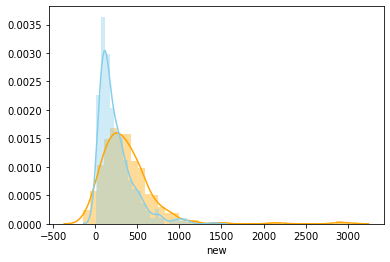

In [48]:
sns.distplot(gold_data.Pred,color='orange')
sns.distplot(gold_data.new,color='skyblue')
plt.show()

### HISTOGRAM

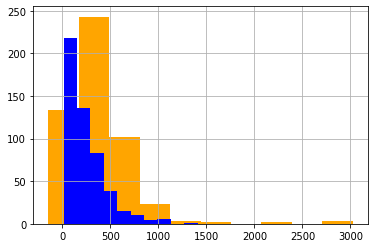

In [51]:
gold_data.Pred.hist(color='orange')
gold_data.new.hist(color='blue')
plt.show()

### PAIRPLOT

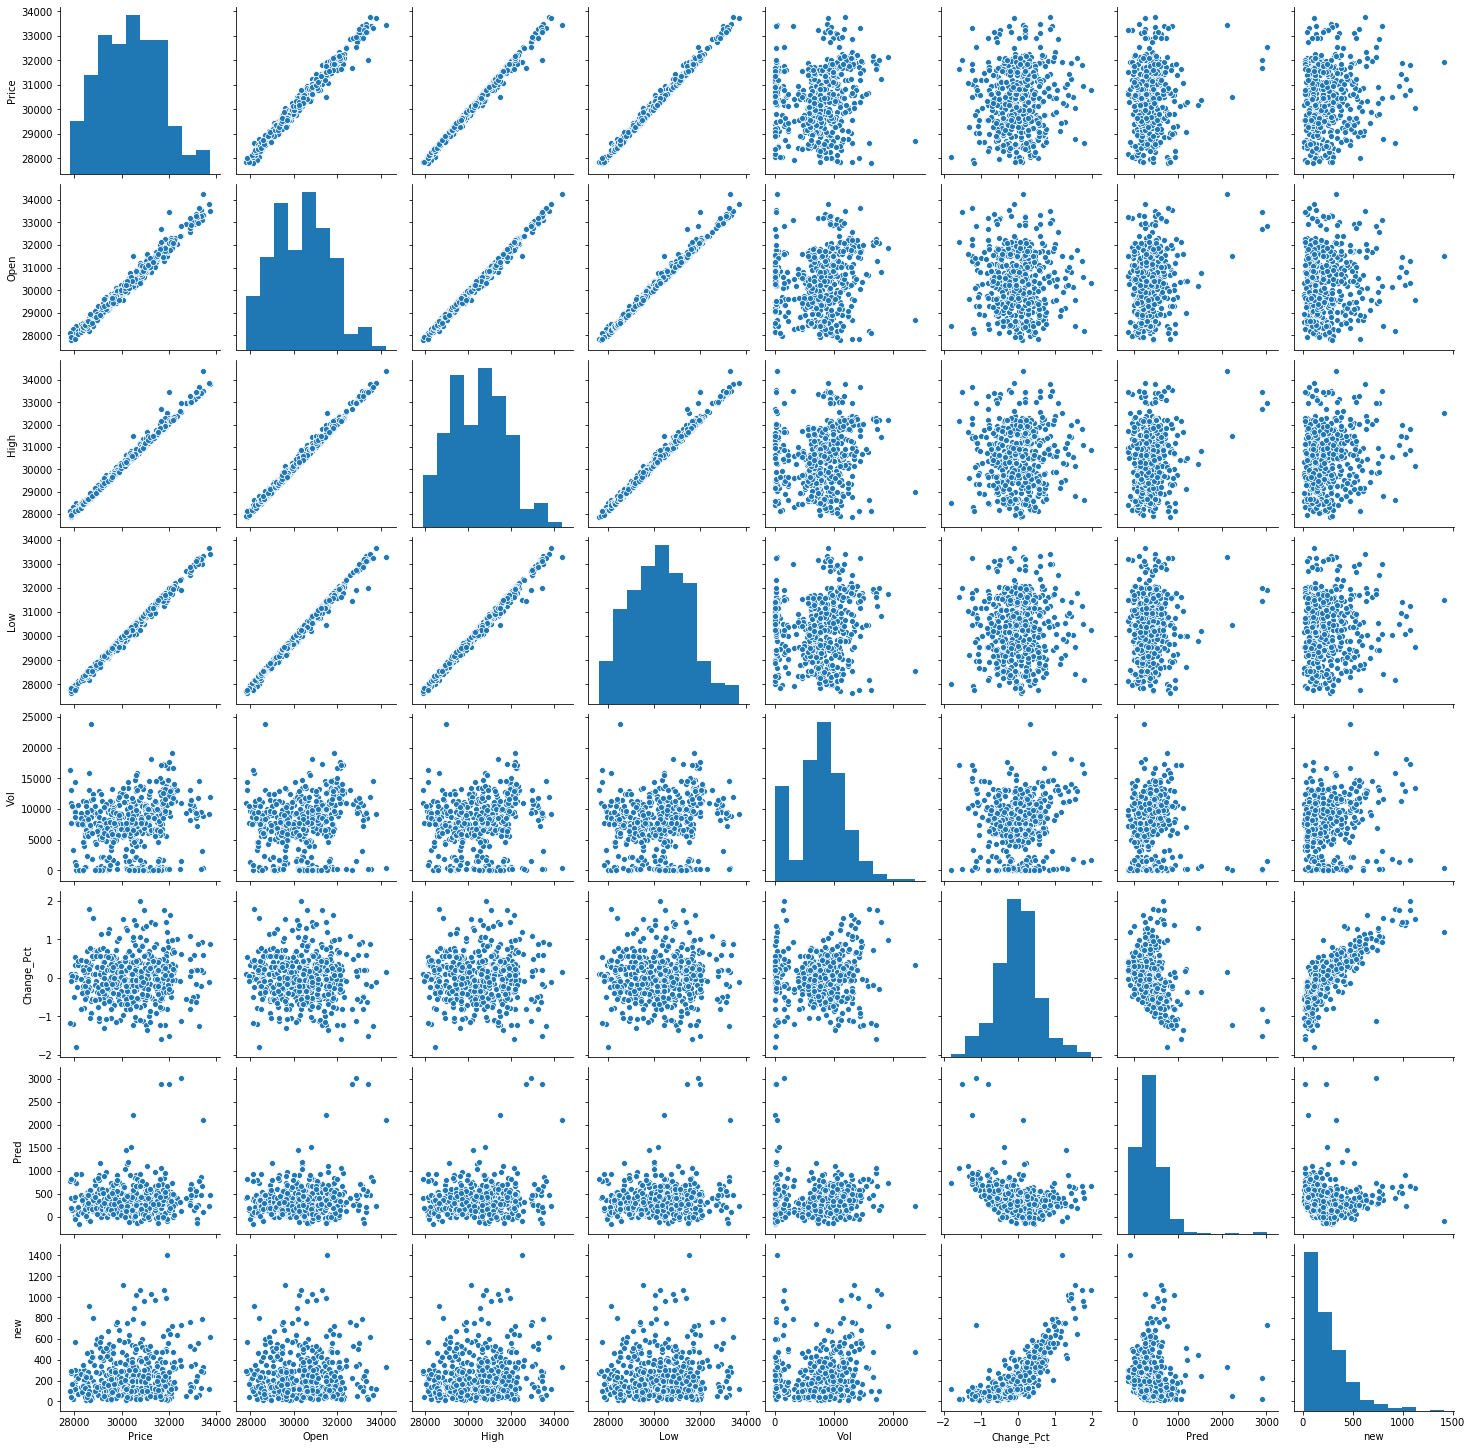

In [52]:
sns.pairplot(gold_data)
plt.show()

#### Result

- **Pred** Column is a linear combination of the OHLC prices with varying coefficients and partially filled.
- **new** Column is a polynomial function of the same inputs.

### CAPM CAPM Analysis and Beta Calculation using regression -<br>
CAPM(Capital Asset Pricing Model) attempts to price securities by examining the relationship that exists between expected returns and risk.<br>
Read more about CAPM. [(Investopedia CAPM reference)](https://www.investopedia.com/terms/c/capm.asp)<br>
The Beta of an asset is a measure of the sensitivity of its returns relative to a market benchmark (usually a market index). How sensitive/insensitive is the returns of an asset to the overall market returns (usually a market index like S&P 500 index). What happens when the market jumps, does the returns of the asset jump accordingly or jump somehow?<br>
Read more about Beta [(Investopedia Beta reference)](https://www.investopedia.com/investing/beta-know-risk/)

## <a id=id2>PROBLEM STATEMENT 3.2 </a>
Import the stock of your choosing AND the Nifty index.<br>
Using linear regression (OLS), calculate -<br>

> - The daily Beta value for the past 3 months. (Daily= Daily returns)<br>
> - The monthly Beta value. (Monthly= Monthly returns)

Refrain from using the (covariance(x,y)/variance(x)) formula.<br>
Attempt the question using regression.[(Regression Reference)](https://financetrain.com/calculating-beta-using-market-model-regression-slope/)<br>
Were the Beta values more or less than 1 ? What if it was negative ?<br>
Discuss. Include a brief writeup in the bottom of your jupyter notebook with your inferences from the Beta values and regression results 

Steps to Calculate Beta
1. Calcute Daily returns of Gold
1. Calcute Daily returns of Nifty
$$Daily Returns = \frac{{}Close Price - Prev price}{Prev Price}$$

#### The daily Beta value for the past 3 months. (Daily= Daily returns)

In [53]:
months = 3
days = months * 21

In [54]:
sulzon = pd.read_csv("SUZLON.csv")
nifty = pd.read_csv("Nifty50.csv")

### Reading sulzon Stock and nifty index data
### Taking SULZON Stock of past 3 months

In [55]:
sulzon_stock = sulzon.tail(days)
sulzon_stock.Date = pd.to_datetime(sulzon_stock.Date)
sulzon_stock = sulzon_stock.set_index('Date')

### Taking Nifty50 index of past 3 months

In [56]:
nifty_stock = nifty.tail(days)
nifty_stock.Date = pd.to_datetime(nifty_stock.Date)
nifty_stock = nifty_stock.set_index('Date')

### Daily Returns of SULZON stock for last 3 months

In [57]:
sulzon_daily_return = sulzon_stock['Close Price'].pct_change().dropna()

In [58]:
sulzon_daily_return

Date
2019-02-07    0.025974
2019-02-08   -0.063291
2019-02-11   -0.067568
2019-02-12    0.000000
2019-02-13   -0.028986
                ...   
2019-05-07   -0.037879
2019-05-08   -0.062992
2019-05-09   -0.050420
2019-05-10    0.132743
2019-05-13   -0.125000
Name: Close Price, Length: 62, dtype: float64

### Daily Returns of Nifty50 index for last 3 months

In [59]:
nifty_daily_return = nifty_stock.Close.pct_change().dropna()

In [60]:
nifty_daily_return

Date
2019-02-07    0.000628
2019-02-08   -0.011365
2019-02-11   -0.005007
2019-02-12   -0.005271
2019-02-13   -0.003485
                ...   
2019-05-07   -0.008652
2019-05-08   -0.012041
2019-05-09   -0.005075
2019-05-10   -0.002026
2019-05-13   -0.011588
Name: Close, Length: 62, dtype: float64

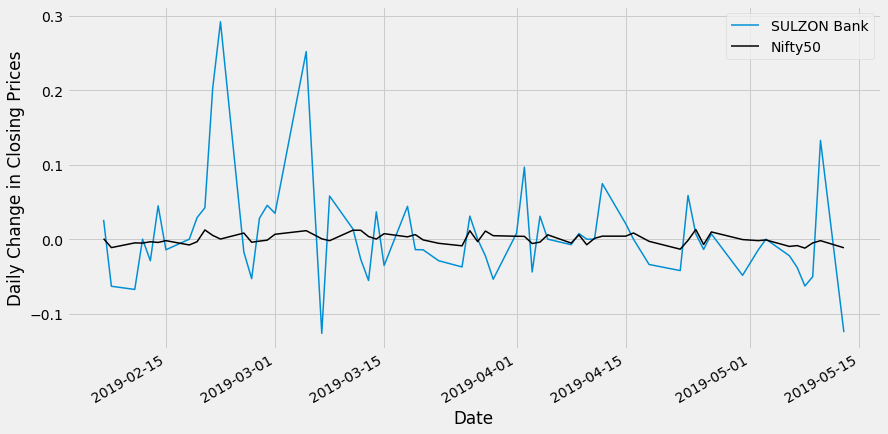

In [61]:
with plt.style.context('fivethirtyeight'):
    sulzon_daily_return.plot(figsize=(13,7),label='SULZON Bank', linewidth=1.5)
    nifty_daily_return.plot(color='k', figsize=(13,7), label='Nifty50', linewidth=1.5)
    plt.ylabel("Daily Change in Closing Prices")
    plt.legend()
    plt.show()

### Reshaping for Regression Purpose

In [62]:
sulzon_daily_return = sulzon_daily_return.ravel().reshape(-1,1)
nifty_daily_return = nifty_daily_return.ravel().reshape(-1,1)

#### Calculating  Daily Beta value using Linear Regression

In [63]:
daily_beta_regressor = LinearRegression()
daily_beta_regressor.fit(nifty_daily_return, sulzon_daily_return)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Daily Beta Value

In [64]:
daily_beta_regressor.coef_.item()

3.4868570632863847

#### Code for Checking Beta for all Stocks

In [68]:
import os

months = 3
days = months * 21
# Taking Nifty50 index of past 3 months
nifty_stock = pd.read_csv("./Nifty50.csv").tail(days)
nifty_stock.Date = pd.to_datetime(nifty_stock.Date)
nifty_stock = nifty_stock.set_index('Date')

minn = 0
minn_stock = ''
maxx = 0
maxx_stock = ''

for file in os.listdir("./Mid_Cap/"):
    # Taking SULZON Stock of past 3 months
    sulzon_stock = pd.read_csv("./Mid_Cap/"+file).tail(days)
    sulzon_stock.Date = pd.to_datetime(sulzon_stock.Date)
    sulzon_stock = sulzon_stock.set_index('Date')
    
    # Daily Returns of SULZON stock for last 3 months
    sulzon_daily_return = sulzon_stock['Close Price'].pct_change().dropna().ravel().reshape(-1,1)

    # Daily Returns of Nifty50 index for last 3 months
    nifty_daily_return = nifty_stock.Close.pct_change().dropna().ravel().reshape(-1,1)
    daily_beta_regressor = LinearRegression()
    daily_beta_regressor.fit(nifty_daily_return, sulzon_daily_return)
    beta = daily_beta_regressor.coef_.item()
    if beta < minn:
        minn = beta
        minn_stock = sulzon_stock.Symbol[0]
    elif beta > maxx:
        maxx = beta
        maxx_stock = sulzon_stock.Symbol[0]
    print(sulzon_stock.Symbol[0]," : ", daily_beta_regressor.coef_.item(), "\n")

print("Maximum : ", maxx_stock," : ", maxx)
print("Minimum : ", minn_stock," : ", minn)

ADANIPOWER  :  2.0324485166666686 

AJANTPHARM  :  0.7644861800825175 

AMARAJABAT  :  0.8454659155497127 

APOLLOTYRE  :  1.2067788716607342 

BERGEPAINT  :  0.9085547104337387 

CASTROLIND  :  0.6452496978373226 

CUMMINSIND  :  1.1905455197205908 

DHFL  :  -3.2583451492584437 

EXIDEIND  :  1.0567306799479226 

GMRINFRA  :  1.604833628431758 

GODREJIND  :  0.9625668179471562 

IDBI  :  1.7522250850830745 

IGL  :  0.6681810213777886 

JINDALSTEL  :  2.075854424901249 

JUBLFOOD  :  0.5971053379460315 

MINDTREE  :  0.04116300465320781 

MRPL  :  1.4013621514579877 

MUTHOOTFIN  :  1.4659246945474347 

NBCC  :  1.9038472259496806 

PNB  :  2.221825429482362 

RBLBANK  :  1.0818180090558862 

RELINFRA  :  1.3673605523252415 

SUNTV  :  1.0166898068156984 

TATACHEM  :  0.5587136641367823 

TATAPOWER  :  1.13577211828896 

VOLTAS  :  0.8489156269284689 

Maximum :  PNB  :  2.221825429482362
Minimum :  DHFL  :  -3.2583451492584437


 #### Daily Beta Value 
- Maximum :  SUZLON  :  3.4868570632863847
- Minimum :  DHFL  :  -3.2583451492584437

#### The Monthly Beta value. (Monthly= Monthly returns)

In [69]:
close_prices= pd.concat([sulzon['Date'],sulzon['Close Price'],nifty['Close']],axis=1)
close_prices.columns = ['Date','SULZON', 'Nifty']
close_prices.head()

,Date,SULZON,Nifty
0,15-May-2017,19.6,9445.40
1,16-May-2017,19.7,9512.25
2,17-May-2017,19.9,9525.75
3,18-May-2017,20.0,9429.45
4,19-May-2017,20.6,9427.90


In [70]:
close_prices.Date =  pd.to_datetime(close_prices.Date)
close_prices['monthwise'] = pd.to_datetime(close_prices['Date']).dt.to_period('M')
monthly_data=close_prices.groupby(['monthwise']).mean()
monthly_data

,SULZON,Nifty
monthwise,,
2017-05,19.657692,9498.557692
2017-06,18.861905,9606.954762
2017-07,18.911905,9850.119048
2017-08,16.819048,9901.183333
2017-09,16.447619,9977.916667
2017-10,15.705000,10138.677500
2017-11,14.763636,10324.754545
2017-12,14.090000,10322.262500
2018-01,15.440909,10771.154545


In [71]:
close_prices_monthly_change = monthly_data.pct_change(fill_method='ffill')*100
close_prices_monthly_change = close_prices_monthly_change.dropna(axis=0)
close_prices_monthly_change.shape

(24, 2)

In [72]:
close_prices_monthly_change

,SULZON,Nifty
monthwise,,
2017-06,-4.048225,1.141195
2017-07,0.265085,2.531128
2017-08,-11.066348,0.518413
2017-09,-2.208381,0.774992
2017-10,-4.515055,1.611166
2017-11,-5.994038,1.835319
2017-12,-4.562808,-0.024137
2018-01,9.587715,4.348776
2018-02,-14.598020,-2.210063


In [73]:
X = close_prices_monthly_change.Nifty.ravel().reshape(-1,1)
y = close_prices_monthly_change.SULZON.ravel().reshape(-1,1)

In [74]:
monthly_beta_regressor = LinearRegression()
monthly_beta_regressor.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Monthly Beta Value

In [75]:
monthly_beta_regressor.coef_.item()

2.700480036565816

#### Conclusion
- **Were the Beta values more or less than 1 ?**

Beta Values is more than 1.

- **What if it was negative ?**

A negative beta correlation would mean an investment that moves in the opposite direction from the stock market. When the market rises, then a negative-beta investment generally falls. When the market falls, then the negative-beta investment will tend to rise.

- **Inferences from the Beta Values and Regression results** 

    - Beta measures the volatility of a stock compared with the volatility of the market as a whole. 
    - A high beta means the stock price will move faster than a stock with low beta. High beta means high volatility, but also the possibility of high returns.
    - β=0: indicates no correlation with NIFTY or some chosen Index/Benchmark.
    - β=1: shows a stock has equally sensitive as the market.
    - β> 1: indicates a stock that’s more volatile/unstable than NIFTY.
    - β< 1: shows less sensitive than NIFTY
    - 1.45 is 45% more sensitive than NIFTY
    
    

- **Daily Beta for last 3 months:**

β = 3.4868

Beta is greater than one and greater than zero which means SULZON Stocks are moving in the same direction as NIFTY but at a very high rate. It moving 3 times fast than the market.


- **Monthly Beta Value:**

beta=2.7005 (β>1)

A beta is greater than one which means SULZON Stocks are moving in the same direction as NIFTY and at a higher rate. It moving 2 times fast than the market.

## My Interpretation

#### It shows SULZON stock is very volatile.
#### It very nice option for Intraday trading but not for long term trading.
#### Instead of investing all money in one stock we can diversify the stocks.
#### Due to high volatility we can get a very big return on investment by using the CAPM model